# Word Embedding

In [0]:
!pip install -q tensorflow-gpu==2.0.0-beta1

     |████████████████████████████████| 348.9MB 82kB/s 
     |████████████████████████████████| 3.1MB 28.6MB/s 
     |████████████████████████████████| 501kB 46.6MB/s 


In [0]:

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [0]:

print(tf.__version__)

2.0.0-beta1


In [0]:
vocab_size = 10000
imdb = keras.datasets.imdb
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=vocab_size)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

print(train_x[0])
print(len(train_x[0]))
print(train_x[1])
print(len(train_x[1]))

print(train_y[:20])

(25000,)
(25000,)
(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
[1, 194, 1153, 194, 

In [0]:
import numpy as np
a = np.array([[1,2,3], [4,5,6,7,8,9]])
print(a.shape)
print(type(a[0]))
print(type(a[1]))

(2,)
<class 'list'>
<class 'list'>


In [0]:
import numpy as np
a = np.array([[1,2,3], [4,5,6]])
print(a.shape)
print(type(a[0]))
print(type(a[1]))

(2, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
word_index = imdb.get_word_index()
# word_index = {'fawn': 34701, 'tsukino': 52006, ... }


# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
# word_index = {'fawn': 34701+3, 'tsukino': 52006+3, ... }

word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
# word_index = {'<PAD>':0, '<START>':1, '<UNK>':2, '<UNUSED>':3, fawn': 34701+3, 'tsukino': 52006+3, ... }

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# reverse_word_index = {0:'<PAD>', 1:'<START>', 2:'<UNK>', 3:'<UNUSED>', 34701+3:'fawn', 52006+3:'tsukino', ... }

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_x[0])

1646592/1641221 [==============================] - 0s 0us/step


"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
a = [1, 14, 22, 16, 43, 530]

for i in a:
  print(reverse_word_index[i])
  


<START>
this
film
was
just
brilliant


In [0]:
from keras.preprocessing import sequence

maxlen = 500

# 모든 데이터를 길이 500으로 만듬. "<PAD>"에 해당하는 0으로 채워 넣음
train_x = sequence.pad_sequences(
    train_x,
    value=word_index["<PAD>"],
    padding='post',
    maxlen=maxlen
)

test_x = sequence.pad_sequences(
    test_x,
    value=word_index["<PAD>"],
    padding='post',
    maxlen=maxlen
)

print(train_x[0])

Using TensorFlow backend.


[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [0]:
print(train_x.shape)

(25000, 500)


# 모델 생성

In [0]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_x,
    train_y,
    epochs=30,
    batch_size=512,
    validation_split=0.2)

W0725 06:59:21.104060 139680375465856 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 2s 99us/sample - loss: 0.6923 - accuracy: 0.5509 - val_loss: 0.6909 - val_accuracy: 0.5916
Epoch 2/30
20000/20000 [==============================] - 1s 56us/sample - loss: 0.6879 - accuracy: 0.5916 - val_loss: 0.6837 - val_accuracy: 0.6178
Epoch 3/30
20000/20000 [==============================] - 1s 53us/sample - loss: 0.6775 - accuracy: 0.7186 - val_loss: 0.6689 - val_accuracy: 0.7466
Epoch 4/30
20000/20000 [==============================] - 1s 54us/sample - loss: 0.6575 - accuracy: 0.7542 - val_loss: 0.6429 - val_accuracy: 0.7572
Epoch 5/30
20000/20000 [==============================] - 1s 54us/sample - loss: 0.6258 - accuracy: 0.7846 - val_loss: 0.6064 - val_accuracy: 0.7856
Epoch 6/30
20000/20000 [==============================] - 1s 55us/sample - loss: 0.5842 - accuracy: 0.8035 - val_loss: 0.5633 - val_accuracy: 0.8002
Epoch 7/30
20000/20000 [==============================] -

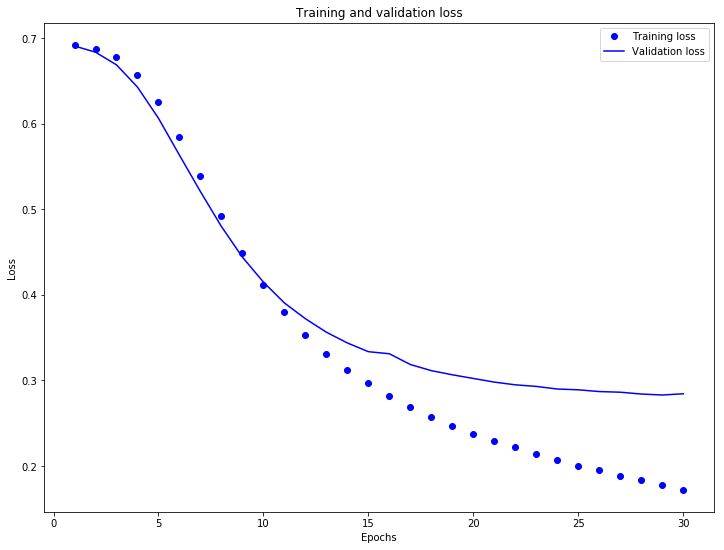

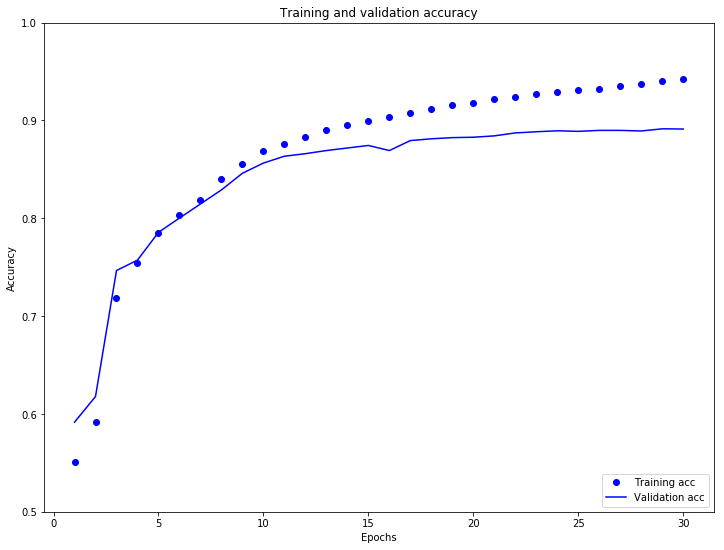

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [0]:

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
!head -10 meta.tsv
!head -10 vecs.tsv

<PAD>
<START>
<UNK>
<UNUSED>
the
and
a
of
to
is
0.02673058	0.048377205	-0.016603028	-0.040414326	-0.023967104	-0.048909735	-0.0033268754	-0.019445995	-0.058923658	-0.070116624	-0.044641424	-0.026371028	-0.0645062	-0.013728866	-0.23836806	-0.04670267
-0.17541805	-0.1108669	0.15666188	0.12284688	-0.13347808	-0.1841268	-0.091242574	-0.14525124	-0.16178888	-0.23763084	-0.19170372	-0.14609717	0.062410574	-0.1444611	-0.2248821	0.14027074
-0.050738424	-0.004883887	-0.012769086	-0.02100324	-0.11419938	-0.131254	0.027563931	-0.047811773	-0.2133075	-0.18091266	-0.08076284	-0.10059366	-0.061605696	-0.017991751	-0.4288596	0.041738737
-0.019653106	-0.03089863	-0.022037113	0.047862794	0.024610426	0.025462773	-0.041829906	-0.027913963	0.04369047	0.03981925	0.0046031363	0.04699141	-0.016259588	-0.0006415248	-0.03123529	0.017263625
0.012176973	0.08423482	-0.08794631	-0.08509109	0.058114734	-0.08714624	0.11704794	-0.0070669055	-0.02438535	-0.11176891	0.01877422	-0.034239683	-0.16855194	0.0986225	-0.4777

# RNN을 사용한 텍스트 분류

In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [0]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

W0725 07:00:52.110336 139680375465856 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


W0725 07:02:42.091176 139680375465856 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
print ('Vocabulary size: {}'.format(tokenizer.vocab_size))

Vocabulary size: 8185


In [0]:
sample_string = 'TensorFlow is cool.'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

assert original_string == sample_string

Tokenized string is [6307, 2327, 4043, 4265, 9, 2724, 7975]
The original string: TensorFlow is cool.


In [0]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
4265 ----> ow 
9 ----> is 
2724 ----> cool
7975 ----> .


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [0]:
print(type(train_dataset))
print(dir(train_dataset))
print(train_dataset.output_shapes)
print(tokenizer.vocab_size)

<class 'tensorflow.python.data.ops.dataset_ops._OptionsDataset'>
['_GeneratorState', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_add_variable_with_custom_getter', '_apply_options', '_as_serialized_graph', '_checkpoint_dependencies', '_component_metadata', '_consumers', '_deferred_dependencies', '_element_structure', '_from_components', '_functions', '_gather_saveables_for_checkpoint', '_graph', '_graph_attr', '_handle_deferred_dependencies', '_has_captured_ref', '_input_dataset', '_inputs', '_is_graph_tensor', '_list_extra_dependencies_for_serialization', '_list_functions

In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

# 모델 정의

In [0]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 396s 1s/step - loss: 0.5129 - accuracy: 0.7498 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 213s 544ms/step - loss: 0.3478 - accuracy: 0.8599 - val_loss: 0.4108 - val_accuracy: 0.8269
Epoch 3/10
391/391 [==============================] - 194s 496ms/step - loss: 0.3012 - accuracy: 0.8866 - val_loss: 0.4195 - val_accuracy: 0.8356
Epoch 4/10
391/391 [==============================] - 189s 483ms/step - loss: 0.2328 - accuracy: 0.9143 - val_loss: 0.4168 - val_accuracy: 0.8418
Epoch 5/10
 84/391 [=====>........................] - ETA: 1:56 - loss: 0.2598 - accuracy: 0.9035

KeyboardInterrupt: ignored